# DeepLabCut Pipline 

**UPDATE 20210424 Version1:** Modify deeplabcut.create_labeled_video in 5.2

**UPDATE 20210424 Version2:** 
- 1.1 !pip install deeplabcut==2.2b8
- 1.4 ProjectFolderName = 'Colab Notebooks/Exploration-YiWang-2021-04-24-V2'
- 4.1 Analyze videos: dynamic cropping=(True, 0.5, 10)
- 5.1 a new section for filtering the predicted bodypart trajactory and 5.2 plot trajectory adjusted to 'filtered=True'

**UPDATE 20210425:**
- only change 'ProjectFolderName' to point to the project FreeExploration-YiWang-2021-04-25

---------------------------------------------------------------


- This notebook demonstrates **the necessary steps to use DeepLabCut**. 

- For detailed use of the functions, I suggest you check 'Function Details'. 

  https://github.com/DeepLabCut/DeepLabCut/blob/master/docs/functionDetails.md

- This demo notebook mostly shows **the most simple code to train and evaluate your model**, but many of the functions have additional features, so **please check out the overview & the protocol paper!**

> Nath\*, Mathis\* et al. *italicized text* **Using DeepLabCut for markerless3D  pose estimation during behavior across species. Nature Protocols, 2019** 

> https://github.com/DeepLabCut/DeepLabCut/blob/master/docs/UseOverviewGuide.md#important-information-on-using-deeplabcut

##The overview of the pipline

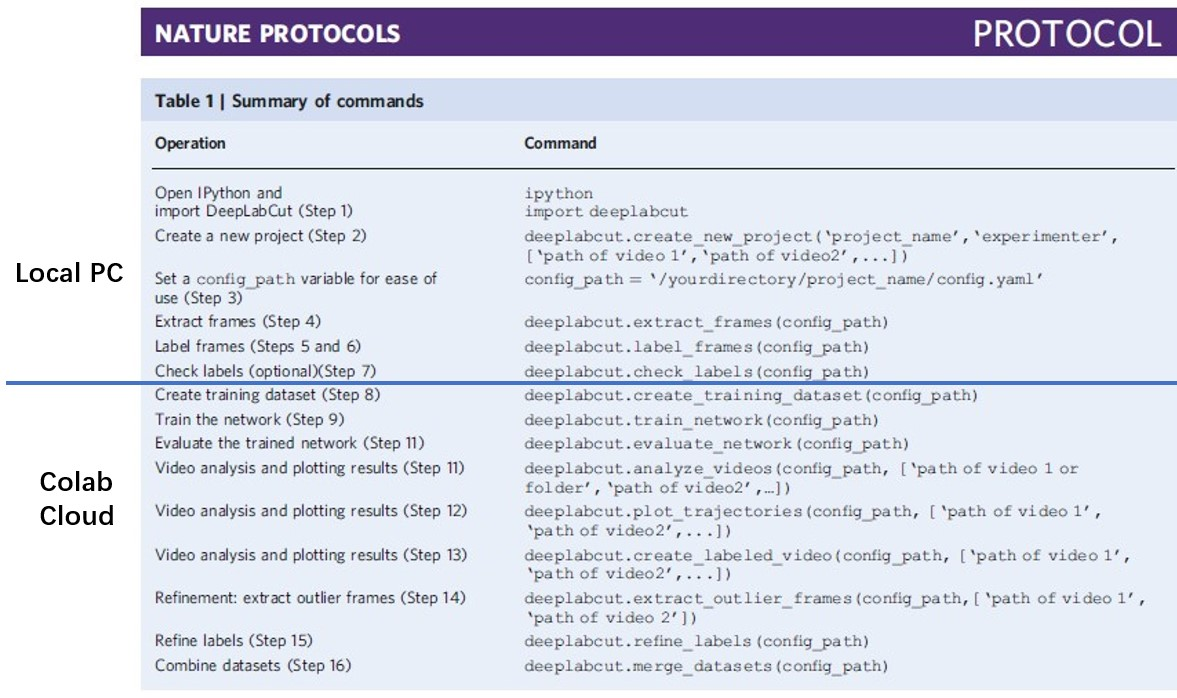







## 1. Env Config

**Note: Before we do any operation, first, go to "Runtime" ->"change runtime type"->select "Python3", and then select "GPU"!**


### 1.1 install all the dependences in this online virtual linux system

In [1]:
!pip install deeplabcut==2.2b8

     |████████████████████████████████| 665kB 8.6MB/s 
     |████████████████████████████████| 102kB 8.1MB/s 
     |████████████████████████████████| 13.1MB 244kB/s 
     |████████████████████████████████| 37.6MB 84kB/s 
     |████████████████████████████████| 3.1MB 45.3MB/s 
     |████████████████████████████████| 184kB 58.5MB/s 
     |████████████████████████████████| 17.3MB 177kB/s 
     |████████████████████████████████| 296kB 53.2MB/s 
     |████████████████████████████████| 9.5MB 45.8MB/s 
     |████████████████████████████████| 552kB 43.2MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-cp37-none-any.whl size=110452 sha256=a2b86a6123cc505e578377836990990c9c39bc298505d56ee683e416c2b9ddbe
  Stored in directory: /root/.cache/pip/wheels/c3/0c/dd/e92392c3f38a41371602d99fc77d6c1d42aadbf0c6afccdd02
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp37-none-any.whl size=11687 sha256=2b07591dfbd2e282490f28ac2f4ad12948401de16e24d02c4d5e87ed1e7829b9

**Note: Be sure to click "RESTART RUNTIME" is it is displayed above above before moving on !**

### 1.2 Use TensorFlow 1.x:

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


### 1.3 Link your Google Drive with your labeled data

Place your porject folder (on your local PC) into you google drive, i.e. upload the folder named "Project-YourName-TheDate" (e.g., Exploration-YiWang-2021-04-21) into google drive.

In [3]:
#Now, let's link to your GoogleDrive. Run this cell and follow the authorization instructions:
#(We recommend putting a copy of the github repo in your google drive if you are using the demo "examples")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.4 Edit the config file in your google drive. 

1. YOU WILL NEED TO EDIT THE PROJECT PATH **in the config.yaml file** TO BE SET TO YOUR GOOGLE DRIVE LINK!

  Typically, this will be: /content/drive/My Drive/.../yourProjectFolderName


In [4]:
# Setup your project folder on the google drive  
ProjectFolderName = 'Colab Notebooks/FreeExploration-YiWang-2021-04-25'

# Createing a path variable that links to your google drive copy
 #No need to edit this, as you set it up before: 
path_config_file = '/content/drive/My Drive/'+ProjectFolderName+'/config.yaml'

# Set video type 
# ! for different projects, the video types could be different. Make sure the type is correct! 
VideoType = 'mp4'  

# Set video path
# ! make sure the video path contains the video file name. For example, in this project, m3v1mp4.mp4
videofile_path = ['/content/drive/My Drive/'+ProjectFolderName+'/videos/m3v1mp4.mp4'] #Enter the list of videos or folder to analyze.

In [5]:
#GUIs don't work on the cloud, so label your data locally on your computer! 
import os
os.environ["DLClight"]="True"

import deeplabcut
deeplabcut.__version__

DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


'2.2b8'

## 2. Model Training

### 2.1 Create a training dataset:

**You must do this step inside of Colab:**
After running the cell below, the training dataset is created and saved in the project directory under the subdirectory **.../Exploration-YiWang-2021-04-21/training-datasets**

This function also creates new subdirectories under **.../Exploration-YiWang-2021-04-21/dlc-models** and appends **the project config.yaml** file with the correct path to the training and testing pose configuration files, i.e., **pose_cfg.yaml**. These files hold the parameters for training the network. Such an example file is provided with the toolbox and named as **pose_cfg.yaml**.

In [6]:
deeplabcut.create_training_dataset(path_config_file, net_type='resnet_50', augmenter_type='imgaug')
# for more details about this func, check this:
# https://github.com/DeepLabCut/DeepLabCut/wiki/DOCSTRINGS#create_training_dataset

It appears that the images were labeled on a Windows system, but you are currently trying to create a training set on a Unix system. 
 In this case the paths should be converted. Do you want to proceed with the conversion?
yes/noyes
Annotation data converted to unix format...
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.8, 1, (array([1, 3, 2, 4]), array([0])))]

### 2.2 Start training:
This function trains the network for a specific shuffle of the training dataset.

Different shuffle seeds will randomly shuffle the dataset and thus generate different training and test sets.

In [7]:
#let's also change the display and save_iters just in case Colab takes away the GPU... 
#if that happens, you can reload from a saved point. Typically, you want to train to 200,000+ iterations.

deeplabcut.train_network(path_config_file, shuffle=1, displayiters=100, saveiters=500)
# https://github.com/DeepLabCut/DeepLabCut/wiki/DOCSTRINGS#train_network

#this will run until you stop it (CTRL+C), or hit "STOP" icon, or when it hits the end (default, 1.03M iterations). 
#Whichever you chose, you will see what looks like an error message, but it's not an error - don't worry....

Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6]],
 'all_joints_names': ['snout',
                      'RightEar',
                      'LeftEar',
                      'Back',
                      'TailBase',
                      'TailMiddle',
                      'TailTip'],
 'batch_size': 1,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_FreeExplorationApr25/FreeExploration_YiWang80shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/usr/local/lib/python3.7/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'meta

Selecting single-animal trainer
Starting with imgaug pose-dataset loader (=default).
Batch Size is 1
Initializing ResNet
Loading ImageNet-pretrained resnet_50
Display_iters overwritten as 100
Save_iters overwritten as 500
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/content/drive/My Drive/Colab Notebooks/FreeExploration-YiWang-2021-04-25/dlc-models/iteration-0/FreeExplorationApr25-trainset80shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss'

iteration: 100 loss: 0.0709 lr: 0.005
iteration: 200 loss: 0.0264 lr: 0.005
iteration: 300 loss: 0.0220 lr: 0.005
iteration: 400 loss: 0.0185 lr: 0.005
iteration: 500 loss: 0.0169 lr: 0.005
iteration: 600 loss: 0.0148 lr: 0.005
iteration: 700 loss: 0.0144 lr: 0.005
iteration: 800 loss: 0.0128 lr: 0.005
iteration: 900 loss: 0.0125 lr: 0.005
iteration: 1000 loss: 0.0128 lr: 0.005
iteration: 1100 loss: 0.0108 lr: 0.005
iteration: 1200 loss: 0.0107 lr: 0.005
iteration: 1300 loss: 0.0102 lr: 0.005
iteration: 1400 loss: 0.0101 lr: 0.005
iteration: 1500 loss: 0.0093 lr: 0.005
iteration: 1600 loss: 0.0089 lr: 0.005
iteration: 1700 loss: 0.0084 lr: 0.005
iteration: 1800 loss: 0.0079 lr: 0.005
iteration: 1900 loss: 0.0083 lr: 0.005
iteration: 2000 loss: 0.0073 lr: 0.005
iteration: 2100 loss: 0.0078 lr: 0.005
iteration: 2200 loss: 0.0071 lr: 0.005
iteration: 2300 loss: 0.0070 lr: 0.005
iteration: 2400 loss: 0.0070 lr: 0.005
iteration: 2500 loss: 0.0067 lr: 0.005
iteration: 2600 loss: 0.0066 lr: 0

The network is now trained and ready to evaluate. Use the function 'evaluate_network' to evaluate the network.


Exception in thread Thread-13:
Traceback (most recent call last):
  File "/tensorflow-1.15.2/python3.7/tensorflow_core/python/client/session.py", line 1365, in _do_call
    return fn(*args)
  File "/tensorflow-1.15.2/python3.7/tensorflow_core/python/client/session.py", line 1350, in _run_fn
    target_list, run_metadata)
  File "/tensorflow-1.15.2/python3.7/tensorflow_core/python/client/session.py", line 1443, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.CancelledError: Enqueue operation was cancelled
	 [[{{node fifo_queue_enqueue}}]]

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/deeplabcut/pose_estimation_tensorflow/train.py", line 91, in load_and_enqueue
 

## 3. Model evaluation

### 3.1 Evaluation
- This funtion evaluates a trained model for
  - a specific shuffle/shuffles 
  - at a particular state or all the states
on the data set.

  Note: "state" means the network trained with a specific iteration (with specific weights).

- The evaluation results are stored in the .h5 and .csv file under the subdirectory 'evaluation_results'. Change the snapshotindex parameter in the config file to 'all' in order to evaluate all the saved models.
  
  - At different steps of DLC, you can change the params in the config file for diff purpose. 
  - For example, here, if we change 'snapshotindex' from -1 to all, the function 'deeplabcut.evaluate_network' will evaluate different states of the trained networks, i.e., the networks trained with different iterations. 
  - However, 'max_snapshots_to_keep' in the func 'deeplabcut.train_network' specifies the last 'max_snapshots_to_keep' num of snapshots are kept. default=5. 
  - therefore, in this evaluation step, if we change 'snapshotindex' from -1 to all, it means the code will evaluate only the last state, but the last 5 states of the trained network.
  - by checking the train and test error outputted by different states of the trained models. we know which state is the best! For example, snapshot-16000 is the best among snapshot 15500,16000,16500,17000,17500.
  - the evalutation results for 5 states are also saved in a csv file.

- In DLC, the authors used **the distance of the pixel positions of the predicted and true body parts** as the evaluation index, i.e., the pixel error. 

- VERY IMPORTANT! The test set and result in the evaluation session is NOT the acutal testing in machine learning. It is the validation set and result! The true test in the model testing session (or novel video analysis) below.

In [8]:
%matplotlib notebook
deeplabcut.evaluate_network(path_config_file, plotting=True)
# param 'plotting': plots the preds on the train and test images.
# https://github.com/DeepLabCut/DeepLabCut/wiki/DOCSTRINGS#evaluate_network

# Here you want to see a low pixel error! 
# Of course, it can only be as good as the labeler, 
# so be sure your labels are good! (And you have trained enough ;)

Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6]],
 'all_joints_names': ['snout',
                      'RightEar',
                      'LeftEar',
                      'Back',
                      'TailBase',
                      'TailMiddle',
                      'TailTip'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_FreeExplorationApr25/FreeExploration_YiWang80shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/usr/local/lib/python3.7/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean_pixel': [123.68, 116.779, 103.939],
 'mirror': False,
 'net_type': 'resnet_50',
 'num_joints': 7,
 'optimizer':

Running  DLC_resnet50_FreeExplorationApr25shuffle1_8000  with # of trainingiterations: 8000
Initializing ResNet


0it [00:00, ?it/s]

Analyzing data...


5it [00:00,  5.13it/s]
  0%|          | 0/5 [00:00<?, ?it/s]

Done and results stored for snapshot:  snapshot-8000
Results for 8000  training iterations: 80 1 train error: 3.24 pixels. Test error: 60.63  pixels.
With pcutoff of 0.6  train error: 3.24 pixels. Test error: 57.8 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


<IPython.core.display.Javascript object>

 20%|██        | 1/5 [00:00<00:00,  4.54it/s]

<IPython.core.display.Javascript object>

 40%|████      | 2/5 [00:00<00:00,  4.48it/s]

<IPython.core.display.Javascript object>

 60%|██████    | 3/5 [00:00<00:00,  4.43it/s]

<IPython.core.display.Javascript object>

 80%|████████  | 4/5 [00:00<00:00,  4.48it/s]

<IPython.core.display.Javascript object>

100%|██████████| 5/5 [00:01<00:00,  4.36it/s]


Running  DLC_resnet50_FreeExplorationApr25shuffle1_8500  with # of trainingiterations: 8500
Initializing ResNet


0it [00:00, ?it/s]

Analyzing data...


5it [00:00,  8.42it/s]
  0%|          | 0/5 [00:00<?, ?it/s]

Done and results stored for snapshot:  snapshot-8500
Results for 8500  training iterations: 80 1 train error: 1.66 pixels. Test error: 60.73  pixels.
With pcutoff of 0.6  train error: 1.66 pixels. Test error: 57.83 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


<IPython.core.display.Javascript object>

 20%|██        | 1/5 [00:00<00:00,  4.32it/s]

<IPython.core.display.Javascript object>

 40%|████      | 2/5 [00:00<00:00,  4.31it/s]

<IPython.core.display.Javascript object>

 60%|██████    | 3/5 [00:00<00:00,  4.27it/s]

<IPython.core.display.Javascript object>

 80%|████████  | 4/5 [00:00<00:00,  4.22it/s]

<IPython.core.display.Javascript object>

100%|██████████| 5/5 [00:01<00:00,  4.21it/s]


Running  DLC_resnet50_FreeExplorationApr25shuffle1_9000  with # of trainingiterations: 9000
Initializing ResNet


0it [00:00, ?it/s]

Analyzing data...


5it [00:00,  8.33it/s]
  0%|          | 0/5 [00:00<?, ?it/s]

Done and results stored for snapshot:  snapshot-9000
Results for 9000  training iterations: 80 1 train error: 2.58 pixels. Test error: 60.49  pixels.
With pcutoff of 0.6  train error: 2.58 pixels. Test error: 57.51 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


<IPython.core.display.Javascript object>

 20%|██        | 1/5 [00:00<00:00,  4.08it/s]

<IPython.core.display.Javascript object>

 40%|████      | 2/5 [00:00<00:00,  4.10it/s]

<IPython.core.display.Javascript object>

 60%|██████    | 3/5 [00:00<00:00,  4.10it/s]

<IPython.core.display.Javascript object>

 80%|████████  | 4/5 [00:00<00:00,  4.06it/s]

<IPython.core.display.Javascript object>

100%|██████████| 5/5 [00:01<00:00,  4.06it/s]


Running  DLC_resnet50_FreeExplorationApr25shuffle1_9500  with # of trainingiterations: 9500
Initializing ResNet


0it [00:00, ?it/s]

Analyzing data...


5it [00:00,  7.97it/s]
  0%|          | 0/5 [00:00<?, ?it/s]

Done and results stored for snapshot:  snapshot-9500
Results for 9500  training iterations: 80 1 train error: 2.53 pixels. Test error: 60.51  pixels.
With pcutoff of 0.6  train error: 2.53 pixels. Test error: 58.01 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


<IPython.core.display.Javascript object>

 20%|██        | 1/5 [00:00<00:01,  3.93it/s]

<IPython.core.display.Javascript object>

 40%|████      | 2/5 [00:00<00:00,  3.86it/s]

<IPython.core.display.Javascript object>

 60%|██████    | 3/5 [00:00<00:00,  3.94it/s]

<IPython.core.display.Javascript object>

 80%|████████  | 4/5 [00:01<00:00,  3.92it/s]

<IPython.core.display.Javascript object>

100%|██████████| 5/5 [00:01<00:00,  3.51it/s]


Running  DLC_resnet50_FreeExplorationApr25shuffle1_10000  with # of trainingiterations: 10000
Initializing ResNet


0it [00:00, ?it/s]

Analyzing data...


5it [00:00,  7.95it/s]
  0%|          | 0/5 [00:00<?, ?it/s]

Done and results stored for snapshot:  snapshot-10000
Results for 10000  training iterations: 80 1 train error: 2.2 pixels. Test error: 61.43  pixels.
With pcutoff of 0.6  train error: 2.2 pixels. Test error: 57.93 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


<IPython.core.display.Javascript object>

 20%|██        | 1/5 [00:00<00:01,  3.78it/s]

<IPython.core.display.Javascript object>

 40%|████      | 2/5 [00:00<00:00,  3.79it/s]

<IPython.core.display.Javascript object>

 60%|██████    | 3/5 [00:00<00:00,  3.81it/s]

<IPython.core.display.Javascript object>

 80%|████████  | 4/5 [00:01<00:00,  3.79it/s]

<IPython.core.display.Javascript object>

100%|██████████| 5/5 [00:01<00:00,  3.75it/s]

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
If it generalizes well, choose the best model for prediction and update the config file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise consider retraining the network (see DeepLabCut workflow Fig 2)


## (Optional) refinement step 

You can it do outside of Colab:
- if your pixel errors are not low enough, please check out the protocol guide on how to refine your network!
- You will need to adjust the labels **outside of Colab!** We recommend coming back to train and analyze videos... 
- Please see the repo and protocol instructions on how to refine your data!

## 4. Model Testing (Video analysis)

### 4.1 Testing on novel videos

- Based on the trained and evaluated network, making predictions to the novel video. 
- The state of the used network is specified by parameters in the config file (in particular the variable 'snapshotindex'), which means, to analysis new videos, we need to pick a state of the network.
- In evalutation, we know that the snapshot-16000 has the best train and test performance among snapshot 15500,16000,16500,17000,17500. So we pick snapshot 16000, i.e, changing the snapshotindex in config.yaml to 1. Otherwise, by default the most recent snapshot is used to analyse the video.
- The results are stored in hd5 file in the same directory where the video resides. Also, you can specify 'save_as_csv=True' in 'deeplabcut.analyze_videos'.
- Check 'm3v1mp4DLC_resnet_50_ExplorationApr21shuffle1_16000.csv' in the 'video', then you understand what does the func do, as shown below. 






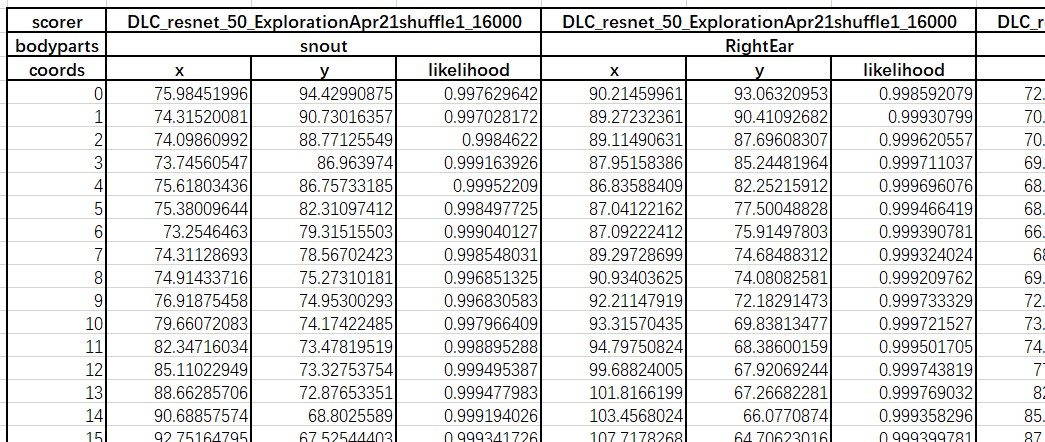

#### Important: the csv output by 'deeplabcut.analyze_videos' is the behavioral data we want! Based on the x-y coords at diff time points, we know the movement of the animal. We can detect the movement patterns and recognize different states of the animal, e.g., freezing, non-freezing, etc.

In [9]:
deeplabcut.analyze_videos(path_config_file, videofile_path, videotype=VideoType, save_as_csv=True, dynamic=(True, 0.5, 10))

Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6]],
 'all_joints_names': ['snout',
                      'RightEar',
                      'LeftEar',
                      'Back',
                      'TailBase',
                      'TailMiddle',
                      'TailTip'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_FreeExplorationApr25/FreeExploration_YiWang80shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/usr/local/lib/python3.7/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean_pixel': [123.68, 116.779, 103.939],
 'mirror': False,
 'net_type': 'resnet_50',
 'num_joints': 7,
 'optimizer':

Using snapshot-9500 for model /content/drive/My Drive/Colab Notebooks/FreeExploration-YiWang-2021-04-25/dlc-models/iteration-0/FreeExplorationApr25-trainset80shuffle1
Starting analysis in dynamic cropping mode with parameters: (True, 0.5, 10)
Switching batchsize to 1, num_outputs (per animal) to 1 and TFGPUinference to False (all these features are not supported in this mode).
Initializing ResNet
Starting to analyze %  /content/drive/My Drive/Colab Notebooks/FreeExploration-YiWang-2021-04-25/videos/m3v1mp4.mp4
/content/drive/My Drive/Colab Notebooks/FreeExploration-YiWang-2021-04-25/videos  already exists!
Loading  /content/drive/My Drive/Colab Notebooks/FreeExploration-YiWang-2021-04-25/videos/m3v1mp4.mp4


  0%|          | 0/2330 [00:00<?, ?it/s]

Duration of video [s]:  77.67 , recorded with  30.0 fps!
Overall # of frames:  2330  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


2346it [02:40, 14.63it/s]

Saving results in /content/drive/My Drive/Colab Notebooks/FreeExploration-YiWang-2021-04-25/videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


'DLC_resnet50_FreeExplorationApr25shuffle1_9500'

## 5. Extra features of Novel video analysis

### 5.1 Filtering

- Filter the predictions with a median filter (default) or with a SARIMAX model. This creates a new .h5 file with the ending "_filtered" that you can use in 
  
  - create_labeled_data and/or 
  - plot trajectories.

In [ ]:
deeplabcut.filterpredictions(path_config_file, videofile_path)

Filtering with median model /content/drive/My Drive/Colab Notebooks/Exploration-YiWang-2021-04-24-V2/videos/m3v1mp4.mp4
Saving filtered csv poses!


### 5.2 Plot the trajectories of the analyzed videos:
 - Since the 'deeplabcut.analyze_videos' has already outputted the x-y coords of each bodypart, plotting the trajectory is an easy task.

 -'deeplabcut.plot_trajectories' plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color.

In [ ]:
deeplabcut.plot_trajectories(path_config_file, videofile_path, videotype=VideoType, filtered=True)

Loading  /content/drive/My Drive/Colab Notebooks/Exploration-YiWang-2021-04-24-V2/videos/m3v1mp4.mp4 and data.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Plots created! Please check the directory "plot-poses" within the video directory


Now you can look at the plot-poses file. Check the "plot-likelihood.png", you might want to change the "p-cutoff" in the config.yaml file so that you have only high confidnece points plotted in the video. i.e. ~0.8 or 0.9. The current default is 0.4. 

### 5.3 Create labeled video:
This funtion is for visualiztion purpose and can be used to create a video in .mp4 format **with labels predicted by the network**. This video is saved in the same directory where the original video resides. 

In [ ]:
deeplabcut.create_labeled_video(path_config_file, videofile_path, videotype=VideoType, draw_skeleton=True, save_frames=True, trailpoints=0)

/content/drive/My Drive/Colab Notebooks/Exploration-YiWang-2021-04-24-V2/videos  already exists!
Starting to process video: /content/drive/My Drive/Colab Notebooks/Exploration-YiWang-2021-04-24-V2/videos/m3v1mp4.mp4
Labeled video m3v1mp4 already created.


## 6. Network Refinement: Extract Outlier Frames

For images with poor labelling performance (“outlier frames”) by the trained-evaluated network, we 
- extract those images and manually corrected the labels
- merge the label-corrected images to the training set for retraining.

One does not necessarily need to correct all errors as common errors could be eliminated by relabeling a few examples and then re-training. 

**How to find these “outlier frames”?**

A priori, given that there is no ground truth data for analyzed videos, it is challenging to find putative “outlier frames”. However, one can use heuristics such as the continuity of body part trajectories, to identify images where the decoder might make large errors.

#### Step1

In [ ]:
deeplabcut.extract_outlier_frames(path_config_file, videofile_path, outlieralgorithm='jump', extractionalgorithm='kmeans',)

Method  jump  found  1617  putative outlier frames.
Do you want to proceed with extracting  10  of those?
If this list is very large, perhaps consider changing the parameters (start, stop, p_bound, comparisonbodyparts) or use a different method.
yes/noyes


0it [00:00, ?it/s]

Frames from video m3v1mp4  already extracted (more will be added)!
Loading video...
Duration of video [s]:  77.666 , recorded @  30.0 fps!
Overall # of frames:  2330 with (cropped) frame dimensions: 
Kmeans-quantization based extracting of frames from 0.0  seconds to 77.67  seconds.
Extracting and downsampling... 1617  frames from the video.


1617it [03:02,  8.87it/s]


Kmeans clustering ... (this might take a while)
Let's select frames indices: [902, 107, 2060, 1810, 1926, 1513, 1362, 490, 400, 179]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

New video was added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\m3v1mp4.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.


#### Step2: back to LOCAL PC

- Download the project folder in the google drive, i.e.,Exploration-YiWang-2021-04-24-V2, to the local PC.
- Set the path of the project, i.e., config_path, to the directory of the downloaded folder.
- execute command: **dlc.refine_labels(config_path)**, then you get the user instruction of **the refinement toolbox**:

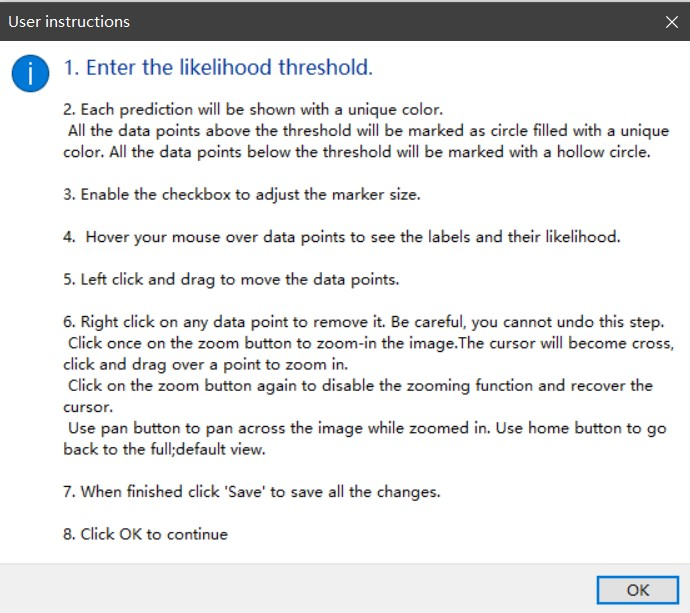

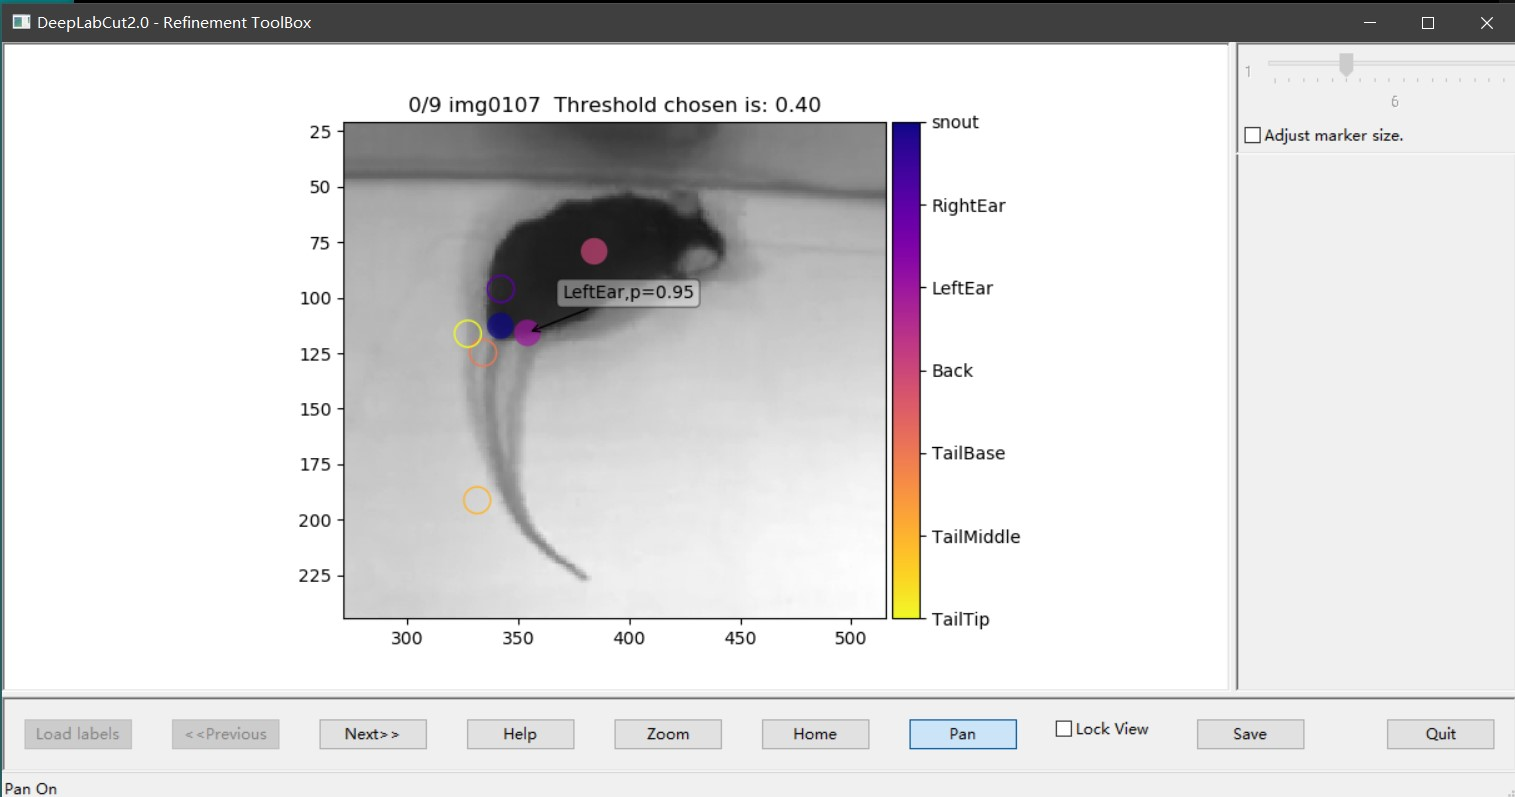

- run **deeplabcut.merge_dataset(config_path)** to merge the manually corrected dataset to the original training dataset. 

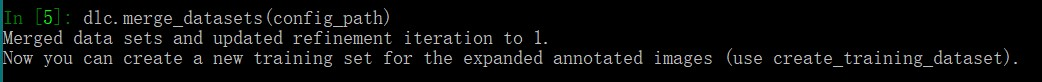